<h1><center> 
    Travaux pratiques:
    
       Interpolation, Intégration numérique
</center></h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Interpolation

## 1.1 Interpolation Lagrange

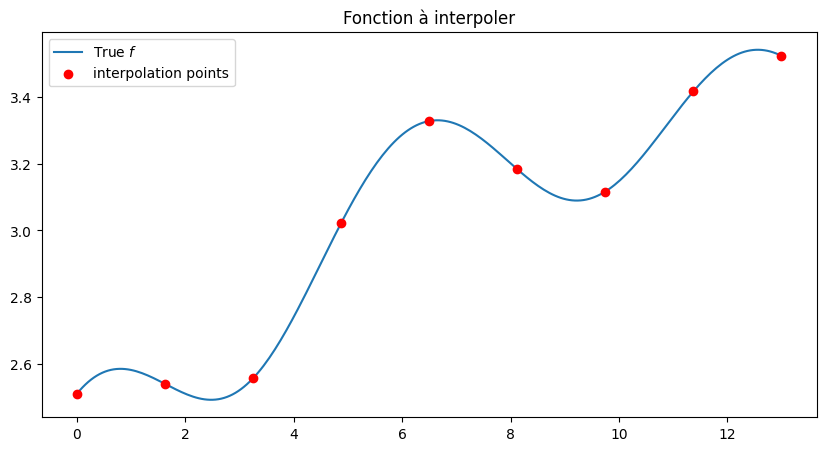

In [2]:
def f(x):
    return np.sqrt(x + 5 + 1.3*np.cos(x**1)- x**2/25)

N = 250
xx = np.linspace(0,13, N)

n = 9
x_interp = np.linspace(0,13, n)

plt.figure(figsize=(10,5))
plt.title("Fonction à interpoler")
plt.plot(xx,f(xx),label=f'True $f$')
plt.scatter(x_interp,f(x_interp),c='r',zorder=3,label='interpolation points');
plt.legend();

In [3]:
class LagrangeInterpolation:
    """
    Classe d'interpolation de Lagrange
    """
    def __init__(self, xinterp, yinterp):
        """
        xinit: abscisses des points d'interpolations
        yinit: ordonnées des points d'interpolations
        """
        
        self.xinterp = xinterp
        self.yinterp = yinterp
        self.n = len(xinterp)
        
        # Construction des polynômes de lagrange en chaque point
        self.lagrange_polynomials = [LagrangeInterpolation.PolynomeBuilder(self.xinterp, i) for i in range(self.n)]
        
        # Construction du polynôme d'interpolation final
        self.interpolation = self._interpolation_polynome_builder()

    def PolynomeBuilder(xinterp, i):
        def Li(xx): 
            """
            Fonction qui renvoie le polynome de Lagrange au point d'abscisse self.xinterp[i].
            Ce polynôme vaut 1 en self.xinterp[i] et 0 en self.xinterp[j] pour j != i. 
            """
            xi = xinterp[i]
            ...
            
            return ...
        return Li
        
    def _interpolation_polynome_builder(self):
        """
        Combine tous les polynômes de Lagrange pour renvoyer le polynôme d'interpolation final.
        """
        def polynome(xx):
            return ...
        return polynome
    
    def __call__(self, xx):
        """
        Permet d'appeler l'instance de classe.
        """
        return self.interpolation(xx)

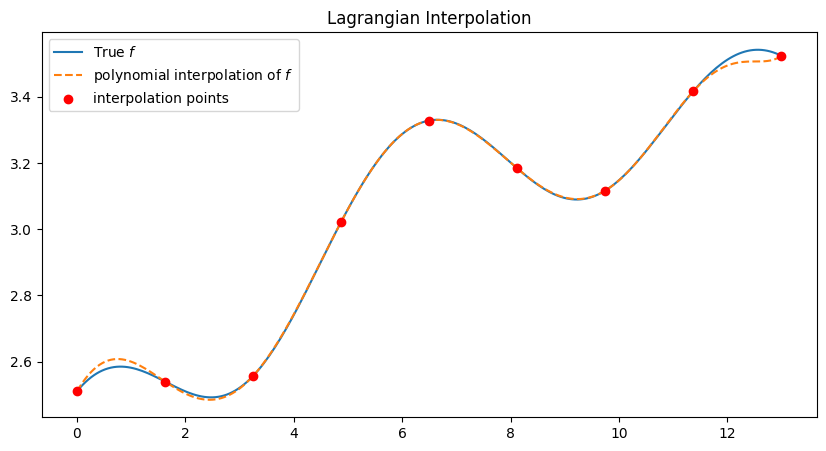

In [4]:
n = 9
x_interp = np.linspace(0,13, n)


li = LagrangeInterpolation(x_interp, f(x_interp))

plt.figure(figsize=(10,5))
plt.plot(xx,f(xx),label=f'True $f$')
plt.title("Lagrangian Interpolation")
plt.plot(xx, li(xx),linestyle='--',label=r'polynomial interpolation of $f$');
plt.scatter(x_interp,f(x_interp),c='r',zorder=3,label='interpolation points');
plt.legend();

## 1.2 Interpolation Cubic Spline

In [5]:
class CubicSpline:
    """
    Classe d'interpolation CubicSpline
    """
    def __init__(self, x_interp, y_interp):
        """
        x_interp: abscisses d'interpolation
        y_interp: f(x_interp)
        """
        self.x_interp = x_interp
        self.y_interp = y_interp
        
        self.n = len(x_interp) - 1
        
        # Calcul des coefficients des polynômes cubiques.
        self.coeffs = self._get_coeffs()
        
        # Construction des fonctions indicatrices
        self.indicatrices = [self._get_indicatrice(i) for i in range(self.n)]
        
        #Construction des polynômes cubiques.
        self.cubic_polys = [self._get_cubic_poly(i) for i in range(self.n)]

    def _get_coeffs(self):
        """
        Calcule les coefficients des polynômes cubiques
        """
        n = len(x_interp) - 1
        
        # Construction de A
        h = self.x_interp[1:] - self.x_interp[:-1]
        null_block = np.zeros((n,n))
        block_1 = np.diag(np.ones(n)) - np.diag(np.ones(n-1),k=1)
        block_1[-1,:] = 0
        block_h = np.diag(list(h))
        block_h_trunc = np.diag(list(h[:-1]) + [0])
        I = np.eye(n)
        
        
        # Remplissage de la matrice A
        A = np.block(...)
        
        # Conditions aux bords
        A[3*n-1,n]=1 ; A[3*n-1,3*n-1]= -2*h[-1] ; 
        A[4*n-1,2*n] = 1;A[4*n-1,3*n-1] = -1; A[4*n-1,-1] = 3*h[-1]
        
        # Construction de b (coefficients a, puis b, puis c, puis d)
        b1 = self.y_interp[:-1]
        b2 = self.y_interp[1:]
        b3 = np.zeros_like(b1)
        b4 = np.zeros_like(b1)
        b = np.hstack((b1,b2,b3,b4))
        
        X = np.linalg.solve(A,b)
        coeffs = X.reshape((4,n))
        
        return coeffs


    def _get_indicatrice(self, i):
        """
        Renvoie la fonction indicatrice qui vaut 1 sur [x_i, x_{i+1}[ et 0 ailleurs.
        """
        xi = self.x_interp[i]
        xip = self.x_interp[i+1]
        if i < self.n-1:
            def ind_i(xx):
                return ((xi <= xx)*1.0) * ((xx < xip)*1.0)
        else:
            def ind_i(xx):
                return ((xi <= xx)*1.0) * ((xx <= xip)*1.0)
        return ind_i
    
    def _get_cubic_poly(self,i):
        """
        Renvoie le i-ème polynôme cubique sur le segment [x_i, x_{i+1}[, obtenu
        à partir des coefficients stockés dans self.coeffs.
        """
        a = self.coeffs[0][i]
        b = self.coeffs[1][i]
        c = self.coeffs[2][i]
        d = self.coeffs[3][i]
        xi = self.x_interp[i]
        def cubic_poly(xx):
            return ...
        
        return cubic_poly
    
    def __call__(self, xx):
        """
        Permet d'appeler l'instance sur des abscisses.
        """
        out = [indicatrice(xx)*cubic_poly(xx) for (yi, indicatrice, cubic_poly) in zip(self.y_interp,
                                                                                         self.indicatrices,
                                                                                         self.cubic_polys)]
        return np.sum(out,axis=0)

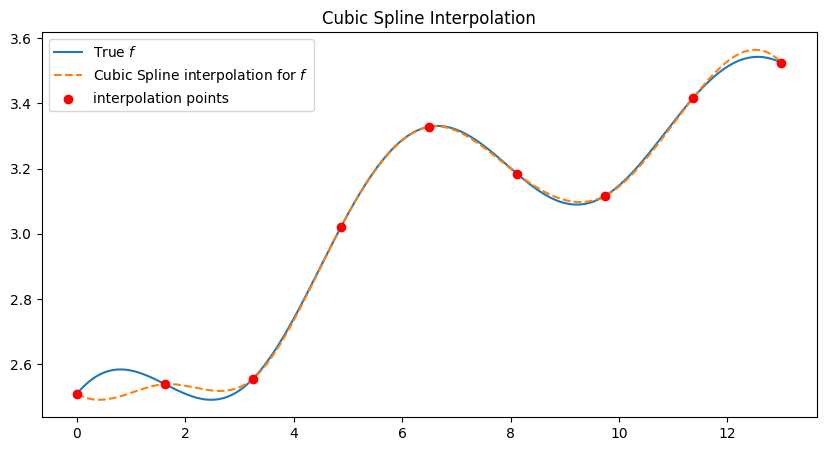

In [6]:
n = 9
x_interp = np.linspace(0, 13, n)

finterp = CubicSpline(x_interp, f(x_interp))

plt.figure(figsize=(10,5))
plt.title("Cubic Spline Interpolation")
plt.plot(xx,f(xx),label=f'True $f$')
plt.plot(xx, finterp(xx),linestyle='--',label=r'Cubic Spline interpolation for $f$');
plt.scatter(x_interp, f(x_interp),c='r',zorder=3,label='interpolation points');
plt.legend();

# 2. Intégration Numérique

__Objectif:__ approximer l'intégrale suivante
$$,
I = \int_0^1 x^p dx = \frac{1}{p+1},
$$

pour $p=4$.


#### Sommes de Darboux pour $y=x^2$ sur l'intervalle $[0,1]$

Inférieure             | Supérieure
:-------------------------:|:-------------------------:
![](../data/Riemann_Integration_and_Darboux_Lower_Sums.gif)  |  ![](../data/Riemann_Integration_and_Darboux_Upper_Sums.gif)


[source Wikipédia](https://fr.wikipedia.org/wiki/Int%C3%A9grale_de_Darboux#:~:text=Plus%20concr%C3%A8tement%2C%20pour%20une%20subdivision,sous%2Dintervalle%20de%20la%20subdivision.)

## 2.1 Coder les formules de quadratures

Coder des fonctions appliquant les formules de quadrature à une fonction `f`, sur `N` rectangles entre les points d'abscisses `a` et `b`
- `rect_gauche(f, N, a=0, b=1)`
- `pt_milieu(f, N, a=0, b=1)`
- `simpson(f, N, a=0, b=1)`

In [7]:
import numpy as np

p=4
def power(x):
    """fonction carrée"""
    return x**p


def rect_gauche(f, N, a=0, b=1):
    """Applique la méthode des rectangles a gauche pour f sur n rectangles entre a et b"""
    xs = np.linspace(a,b, N)
    h = xs[1] - xs[0]
    I = 0
    for i in range(...):
        ...

    return I


def pt_milieu(f, N, a=0, b=1):
    """Applique la méthode du point milieu pour f sur n rectangles entre a et b"""
    xs = np.linspace(a,b, N)
    h = xs[1] - xs[0]
    I = 0
    for i in range(...):
        ...
    return I


def simpson(f, N, a=0, b=1):
    """Applique la méthode de Simpson pour f sur n rectangles entre a et b"""
    xs = np.linspace(a,b, N)
    h = xs[1] - xs[0]
    I = 0
    for i in range(...):
        ...
    return I


N = 10**4
rect_gauche(power, N )

0.19994999833349997

## 2.2 Vérifier l'ordre des méthodes

Calculer pour chaque formule de quadrature, pour les nombres de rectangles $N= 10, 10^2, 10^3, 10^4$

l'erreur d'approximation donnée par :
$$
\varepsilon_n^{méthode} = |J^{méthode}_n - I|.
$$

Plotter pour chaque méthode, l'erreur d'approximation en fonction du nombre de rectangles $N$.

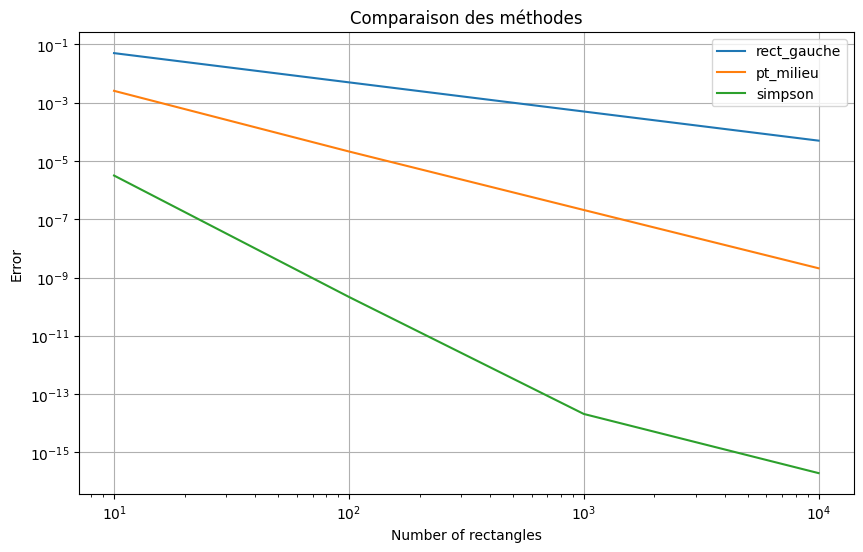

In [8]:
Ns = [10**i for i in range(1,5)]

methodes = [rect_gauche, pt_milieu, simpson]

plt.figure(figsize=(10,6))
p=5
for methode in methodes:    
    erreurs = []
    for N in Ns:
        approx_num = methode(power, N)
        erreur = abs(approx_num - 1/(p+1))
        erreurs.append(erreur)

    plt.plot(Ns, erreurs,label=methode.__name__)



plt.loglog();
plt.legend();
plt.grid(); plt.xlabel("Number of rectangles"); plt.ylabel('Error');
plt.title("Comparaison des méthodes");